# Explore MR-ART dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import sklearn.preprocessing
import sklearn.decomposition

In [2]:
iqms = pd.read_csv("../Data/group_T1w.tsv", sep="\t")
scores = pd.read_csv("../Data/scores.tsv", sep="\t")

In [3]:
scores["STAND"] = scores["bids_name"].str.contains("standard")
scores["HM1"] = scores["bids_name"].str.contains("motion1")
scores["HM2"] = scores["bids_name"].str.contains("motion2")

In [4]:
conditions = [
    (scores['STAND'] == True),
    (scores['HM1'] == True),
    (scores['HM2'] == True)]
choices = [1, 2, 3]
scores['condition'] = np.select(conditions, choices)
print(scores)

                          bids_name  score  STAND    HM1    HM2  condition
0       sub-000103_acq-standard_T1w      1   True  False  False          1
1    sub-000103_acq-headmotion1_T1w      2  False   True  False          2
2    sub-000103_acq-headmotion2_T1w      3  False  False   True          3
3       sub-000148_acq-standard_T1w      1   True  False  False          1
4    sub-000148_acq-headmotion1_T1w      3  False   True  False          2
..                              ...    ...    ...    ...    ...        ...
431  sub-992121_acq-headmotion1_T1w      2  False   True  False          2
432  sub-992121_acq-headmotion2_T1w      2  False  False   True          3
433     sub-992238_acq-standard_T1w      1   True  False  False          1
434  sub-992238_acq-headmotion1_T1w      3  False   True  False          2
435  sub-992238_acq-headmotion2_T1w      3  False  False   True          3

[436 rows x 6 columns]


In [45]:
scores

,bids_name,score,STAND,HM1,HM2,condition
0,sub-000103_acq-standard_T1w,1,True,False,False,1
1,sub-000103_acq-headmotion1_T1w,2,False,True,False,2
2,sub-000103_acq-headmotion2_T1w,3,False,False,True,3
3,sub-000148_acq-standard_T1w,1,True,False,False,1
4,sub-000148_acq-headmotion1_T1w,3,False,True,False,2
...,...,...,...,...,...,...
431,sub-992121_acq-headmotion1_T1w,2,False,True,False,2
432,sub-992121_acq-headmotion2_T1w,2,False,False,True,3
433,sub-992238_acq-standard_T1w,1,True,False,False,1
434,sub-992238_acq-headmotion1_T1w,3,False,True,False,2


In [46]:
px.strip(scores, x="score", y="condition", color="bids_name")

<AxesSubplot: xlabel='condition', ylabel='score'>

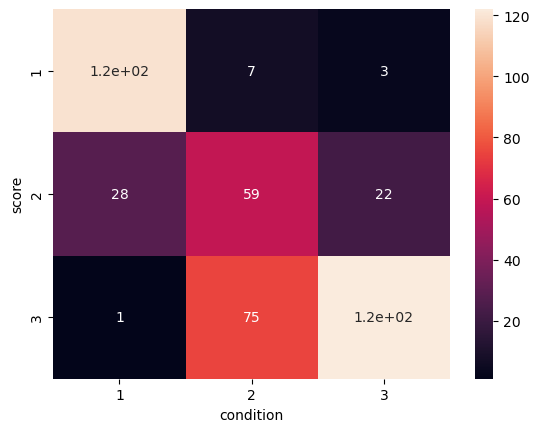

In [5]:
sns.heatmap(pd.crosstab(scores["score"], scores["condition"]), annot=True)

In [6]:
iqms_use = iqms.drop(["bids_name","size_x", "size_y", "size_z", "spacing_x", "spacing_y", "spacing_z"], axis=1)
scaler = sklearn.preprocessing.StandardScaler()
iqms_scaled = scaler.fit_transform(iqms_use)
iqms_scaled = pd.DataFrame(iqms_scaled, columns=iqms_use.columns)

In [7]:
iqms_scaled

,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,icvs_gm,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,-0.891671,1.023455,0.379405,0.946453,0.123567,-0.157856,0.347641,0.133998,-1.053330,1.653851,...,-0.579687,-0.328985,0.664616,0.699918,-0.661274,-0.662092,0.370218,1.094305,0.944828,0.595587
1,0.322492,-0.481170,0.801350,0.170918,-0.342638,-0.669880,-0.226566,-0.081536,-1.460376,0.608160,...,0.749833,-0.179988,0.977603,-0.253814,0.485443,0.419752,0.458946,0.416501,0.581384,-0.397384
2,-1.198496,1.446902,0.075100,-0.946513,0.006137,-0.202609,0.214003,-0.030905,-1.187485,2.093364,...,-0.784952,-0.338320,0.498901,0.889660,-0.868823,-0.873470,0.947218,1.395321,0.962421,0.599161
3,0.607133,-0.728387,0.555687,-0.404468,-0.297952,-0.207820,-0.367656,-0.273105,-0.941898,-0.261450,...,0.650114,0.948030,-0.288896,-0.624692,0.642446,0.627561,-1.407102,0.084631,0.058673,-0.062371
4,0.089333,-0.168848,0.483471,0.159432,-0.103982,0.047497,-0.213522,-0.119734,-0.772334,0.119812,...,0.115257,0.825849,-0.256005,-0.198972,0.161695,0.169568,-1.857269,0.258404,0.227331,0.320730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.574475,0.459102,1.106414,0.149363,0.181063,0.342071,0.267109,-0.137932,0.658798,0.089322,...,-0.656950,-0.172442,0.747438,0.002640,-0.323392,-0.207552,1.229741,0.334682,-0.199817,-0.725678
432,-1.165106,1.337207,0.707725,-0.946513,0.806795,0.998398,0.969088,0.277350,1.092544,0.446293,...,-0.844802,-0.259740,0.359484,0.940510,-0.914859,-0.933136,1.314992,0.870827,-0.036182,-0.299338
433,-0.336329,0.212102,0.022202,0.914001,0.424312,0.288854,0.540691,0.374432,-0.318152,0.400575,...,0.177875,0.370348,0.767916,-0.232326,0.213313,0.214843,0.473483,0.148033,0.496048,1.543252
434,0.744436,-0.927664,0.535875,0.505978,-0.087667,-0.188586,-0.088070,0.038501,-0.865901,0.092194,...,1.002042,-0.535891,0.727136,-1.210021,1.171428,1.189201,0.475541,-0.590150,-0.422853,0.869156


In [38]:
col_names_pca = [f"component{i+1}" for i in range(62)]
col_names_kpca = [f"component{i+1}" for i in range(435)]

In [30]:
pca = sklearn.decomposition.PCA()
iqms_pca = pca.fit_transform(iqms_scaled)
# iqms_pca = pca.components_
iqms_pca = pd.DataFrame(iqms_pca, columns=col_names_pca)

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component53,component54,component55,component56,component57,component58,component59,component60,component61,component62
0,-3.244906,-0.995331,-1.920710,-0.288084,1.678550,-1.253706,-0.412392,-0.334160,-1.125633,0.167429,...,-0.005245,0.001201,0.004252,-0.003076,2.669054e-15,5.268857e-15,3.519825e-15,-7.263468e-16,1.061351e-15,-8.879754e-16
1,2.241555,-2.096961,0.114146,-1.776237,2.220306,-1.224056,-1.083462,-0.769638,-1.503206,-0.503265,...,-0.024666,-0.004618,-0.004539,0.001246,-6.524827e-16,6.255369e-16,-1.610354e-15,1.217634e-16,-3.427044e-16,5.749415e-16
2,-4.837443,-1.119251,-1.760668,1.491404,2.047120,-0.803683,-1.358210,-0.779947,-0.581402,-0.547745,...,-0.008813,0.001176,-0.000779,0.002489,1.787584e-15,9.647545e-16,-1.310314e-15,1.665948e-15,5.766498e-16,-5.941826e-17
3,3.518954,-1.762534,-0.551369,-0.627797,-1.197490,1.406677,-1.139467,-0.019117,-0.643945,1.508294,...,-0.010416,-0.009294,-0.003357,-0.000025,1.344519e-16,1.211390e-16,2.696397e-15,2.540196e-15,5.329036e-16,-1.554688e-15
4,1.119710,-1.764848,-0.689370,-0.461158,-1.349369,0.909232,-1.179177,-0.026415,-0.719839,1.747563,...,0.007072,0.012658,0.004126,-0.003265,6.936230e-15,-2.956692e-15,-8.208992e-17,6.229353e-16,-5.422509e-16,-2.065096e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.092030,5.700788,-1.505234,1.804113,1.161364,-2.742373,0.147254,-0.158304,-0.640245,-2.283422,...,-0.003867,0.003337,0.024026,-0.004067,8.211429e-16,1.906415e-16,5.663130e-17,4.333812e-16,-7.374275e-18,1.512129e-18
432,-4.368624,4.997570,-1.029338,2.258161,1.537914,-1.101758,-0.144504,-0.184751,0.222433,-1.565266,...,0.007379,0.007904,-0.000151,-0.000666,-2.042360e-15,-2.087167e-15,4.019751e-16,6.482354e-16,1.651389e-16,1.556490e-16
433,0.700216,0.840855,-0.975402,-0.017463,1.228321,-4.088896,-0.655966,0.064879,-0.877200,1.671551,...,-0.002864,0.004127,0.021037,0.000091,-1.753177e-15,-1.822762e-15,1.817168e-16,7.176005e-16,-1.057238e-16,-1.196732e-16
434,4.734530,0.374285,-1.048333,-0.412661,1.462022,-3.082140,-0.299189,0.518335,-0.160315,0.789995,...,0.024311,0.008918,0.011737,0.003677,-1.700665e-16,2.064146e-15,-2.954033e-16,-7.851799e-16,-6.104016e-17,-2.603148e-16


In [37]:
kpca = sklearn.decomposition.KernelPCA(kernel="rbf", fit_inverse_transform=True)
kpca.fit(iqms_scaled)
iqms_kpca = kpca.X_transformed_fit_
iqms_kpca.shape

(436, 435)

In [39]:
iqms_kpca = pd.DataFrame(iqms_kpca, columns=col_names_kpca)

In [ ]:
iqms_kpca = pd.DataFrame(iqms_kpca, columns=col_names_pca)

In [32]:
fig = px.scatter(iqms_pca, x="component1", y="component2", color=scores["condition"])
fig.show()

In [40]:
fig = px.scatter(iqms_kpca, x="component1", y="component2", color=scores["condition"])
fig.show()

In [42]:
fig = px.scatter_3d(iqms_pca, x="component1", y="component2", z="component3", color=scores["condition"])
fig.show()

In [ ]:
fig = px.scatter_3d(iqms_kpca, x="component1", y="component2", z="component3", color=scores["condition"])
fig.show()

In [49]:
fig = px.histogram(iqms_pca, x="component1", color=scores["condition"], marginal="rug")
fig.show()

In [50]:
fig = px.histogram(iqms_pca, x="component1", color=scores["score"], marginal="rug")
fig.show()